In [16]:
import numpy as np
from rubin_scheduler.scheduler.utils import (
    ConstantFootprint,
    CurrentAreaMap,
    make_rolling_footprints,
Footprint
)
from rubin_scheduler.site_models import Almanac
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline

In [13]:
# Modify the footprint
mjd_start = 60796.0
nside = 32
nslice=2
rolling_scale = 0.9
temp_uniform = 1

magellenic_clouds_ratios = {
    "u": 0.65,
    "g": 0.65,
    "r": 1.1,
    "i": 1.1,
    "z": 0.34,
    "y": 0.35,
}
sky = CurrentAreaMap(nside=nside)
footprints_hp_array, labels = sky.return_maps(
    magellenic_clouds_ratios=magellenic_clouds_ratios
)


wfd_indx = np.where((labels == "lowdust") | (labels == "virgo"))[0]
wfd_footprint = footprints_hp_array["r"] * 0
wfd_footprint[wfd_indx] = 1

footprints_hp = {}
for key in footprints_hp_array.dtype.names:
    footprints_hp[key] = footprints_hp_array[key]

footprint_mask = footprints_hp["r"] * 0
footprint_mask[np.where(footprints_hp["r"] > 0)] = 1

repeat_night_weight = None

# Use the Almanac to find the position of the sun at the start of survey
almanac = Almanac(mjd_start=mjd_start)
sun_moon_info = almanac.get_sun_moon_positions(mjd_start)
sun_ra_start = sun_moon_info["sun_RA"].copy()

footprints = make_rolling_footprints(
    fp_hp=footprints_hp,
    mjd_start=mjd_start,
    sun_ra_start=sun_ra_start,
    nslice=nslice,
    scale=rolling_scale,
    nside=nside,
    wfd_indx=wfd_indx,
    order_roll=1,
    n_cycles=3,
    uniform=temp_uniform,
)

u_fp = Footprint(mjd_start, sun_ra_start=sun_ra_start)
for key in footprints_hp:
    u_fp.set_footprint(key, footprints_hp[key])

In [14]:
footprints, u_fp

(<rubin_scheduler.scheduler.utils.footprints.Footprints at 0x308db7710>,
 <rubin_scheduler.scheduler.utils.footprints.Footprint at 0x30f29ee90>)

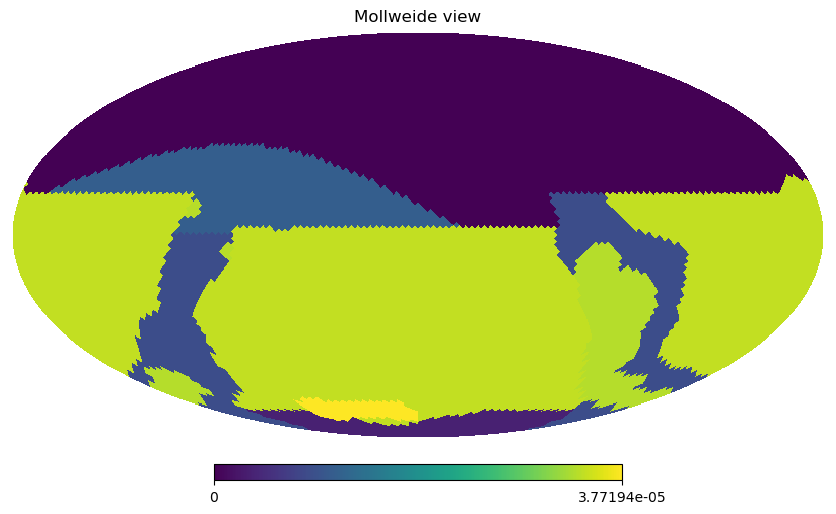

In [17]:
hp.mollview(footprints(mjd_start+365)['r'])

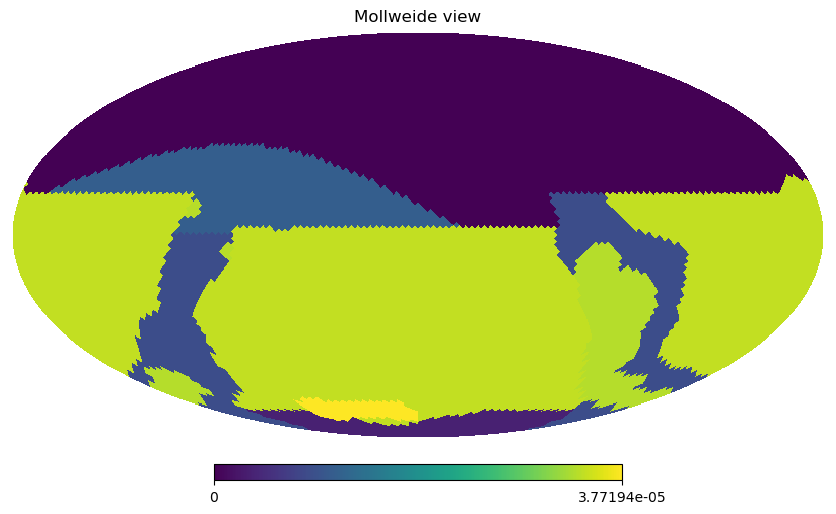

In [18]:
hp.mollview(u_fp(mjd_start+365)['r'])

In [19]:
result = []
for night in np.arange(365, 365*2, 1):
    result.append(np.max(u_fp(mjd_start+night)['r'] - footprints(mjd_start+night)['r']))

In [24]:
night = 370

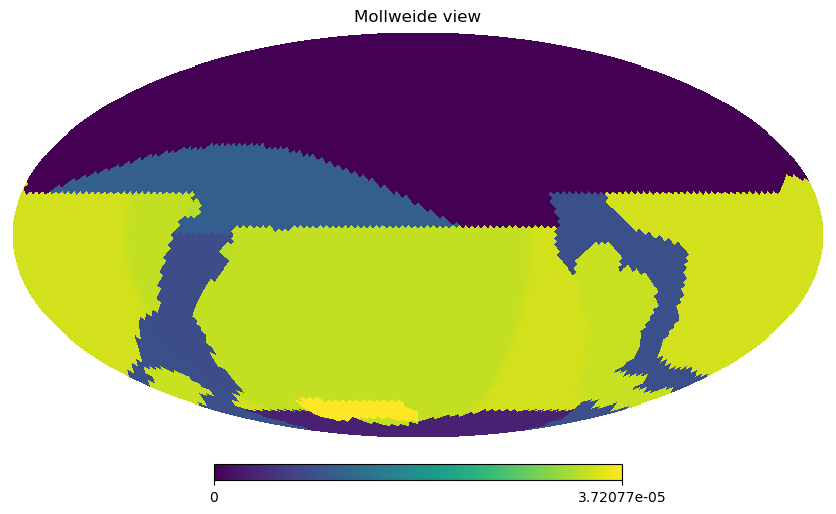

In [25]:
hp.mollview(u_fp(mjd_start+night)['r'])

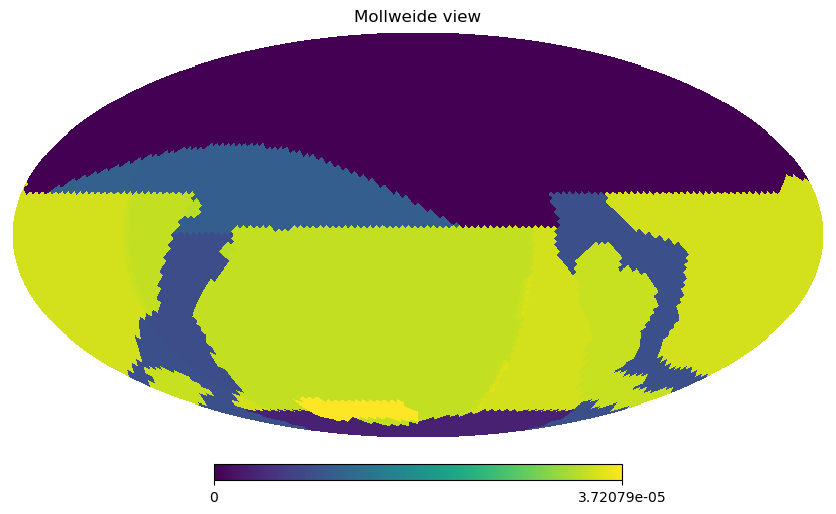

In [26]:
hp.mollview(footprints(mjd_start+night)['r'])